# 实现线性回归 

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 生成数据集

In [2]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

In [3]:
print("features:",features[0],"\nlabels:",labels[0])

features: tensor([-0.2825, -1.1015]) 
labels: tensor([7.3807])


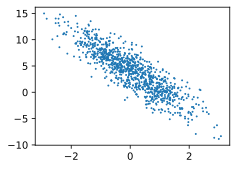

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

## 读取数据集 

In [5]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]        

In [6]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.7444,  0.5946],
        [-0.3062,  1.0377],
        [-2.6353,  0.5562],
        [ 0.3310, -0.9781],
        [-1.0591, -0.0300],
        [ 2.1825, -0.2277],
        [ 1.1502, -0.7115],
        [ 0.9009,  0.6690],
        [ 1.4207, -0.9141],
        [ 1.6292, -0.5838]]) 
 tensor([[ 0.6800],
        [ 0.0728],
        [-2.9611],
        [ 8.1996],
        [ 2.1998],
        [ 9.3440],
        [ 8.9067],
        [ 3.7419],
        [10.1617],
        [ 9.4387]])


## 初始化模型参数 

In [7]:
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

## 定义模型 

## 定义损失函数 

## 定义优化算法 

In [8]:
lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss

In [9]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        d2l.sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch +1},loss {float(train_l.mean()):f} ')

epoch 1,loss 0.040385 
epoch 2,loss 0.000151 
epoch 3,loss 0.000049 


In [10]:
print(f'w的估计误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b-b}')

w的估计误差:tensor([-0.0003, -0.0010], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0003], grad_fn=<RsubBackward1>)
